## FRAUD DETECTION

### Problem Statement:
This internship project focuses on leveraging machine learning classification techniques to develop an effective fraud detection system for Fastag transactions. The dataset comprises key features such as transaction details, vehicle information, geographical location, and transaction amounts. The goal is to create a robust model that can accurately identify instances of fraudulent activity, ensuring the integrity and security of Fastag transactions.

## Data Columns
1. Transaction_ID: Unique identifier for each transaction.
2. Timestamp: Date and time of the transaction.
3. Vehicle_Type: Type of vehicle involved in the transaction.
4. FastagID: Unique identifier for Fastag.
5. TollBoothID: Identifier for the toll booth.
6. Lane_Type: Type of lane used for the transaction.
7. Vehicle_Dimensions: Dimensions of the vehicle.
8. Transaction_Amount: Amount associated with the transaction.
9. Amount_paid: Amount paid for the transaction.
10. Geographical_Location: Location details of the transaction.
11. Vehicle_Speed: Speed of the vehicle during the transaction.
12. Vehicle_Plate_Number: License plate number of the vehicle.
13. Fraud_indicator: Binary indicator of fraudulent activity (target variable).

In [1]:
# Importing important libraries, metrics andn models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date
import plotly.express as px
import time

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

In [2]:
### loading the Data

def wrangle (filepath):
    df = pd.read_csv(filepath,parse_dates=["Timestamp"])
    return df

In [3]:
df = wrangle("FastagFraudDetection.csv")
df.head()

Transaction_ID           Timestamp Vehicle_Type         FastagID  \
0               1 2023-01-06 11:20:00         Bus   FTG-001-ABC-121   
1               2 2023-01-07 14:55:00          Car  FTG-002-XYZ-451   
2               3 2023-01-08 18:25:00   Motorcycle              NaN   
3               4 2023-01-09 02:05:00        Truck  FTG-044-LMN-322   
4               5 2023-01-10 06:35:00          Van  FTG-505-DEF-652   

  TollBoothID Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0       A-101   Express              Large                 350          120   
1       B-102   Regular              Small                 120          100   
2       D-104   Regular              Small                   0            0   
3       C-103   Regular              Large                 350          120   
4       B-102   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292             65           KA11AB1234   
1  13.059816123454882, 77.77068662374292             78           KA66CD5678   
2  13.059816123454882, 77.77068662374292             53           KA88EF9012   
3  13.059816123454882, 77.77068662374292             92           KA11GH3456   
4  13.059816123454882, 77.77068662374292             60           KA44IJ6789   

  Fraud_indicator  
0           Fraud  
1           Fraud  
2       Not Fraud  
3           Fraud  
4           Fraud

### Data Exploration

In [4]:
# checking for Null values and duplicated Values

df.isna().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [5]:
## checking for duplicated value
df.duplicated().sum()

0

In [6]:
# checking for the shape of the data
df.shape

(5000, 13)

In [7]:
# checking the quick summary of the numerical data 
df.describe()

Transaction_ID                   Timestamp  Transaction_Amount  \
count     5000.000000                        5000          5000.00000   
mean      2500.500000  2023-06-13 06:32:39.756000           161.06200   
min          1.000000         2023-01-01 00:00:00             0.00000   
25%       1250.750000         2023-03-14 02:42:00           100.00000   
50%       2500.500000         2023-06-02 17:22:30           130.00000   
75%       3750.250000         2023-09-08 08:06:45           290.00000   
max       5000.000000         2023-12-31 21:45:00           350.00000   
std       1443.520003                         NaN           112.44995   

       Amount_paid  Vehicle_Speed  
count  5000.000000    5000.000000  
mean    141.261000      67.851200  
min       0.000000      10.000000  
25%      90.000000      54.000000  
50%     120.000000      67.000000  
75%     160.000000      82.000000  
max     350.000000     118.000000  
std     106.480996      16.597547

In [8]:
# checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         5000 non-null   int64         
 1   Timestamp              5000 non-null   datetime64[ns]
 2   Vehicle_Type           5000 non-null   object        
 3   FastagID               4451 non-null   object        
 4   TollBoothID            5000 non-null   object        
 5   Lane_Type              5000 non-null   object        
 6   Vehicle_Dimensions     5000 non-null   object        
 7   Transaction_Amount     5000 non-null   int64         
 8   Amount_paid            5000 non-null   int64         
 9   Geographical_Location  5000 non-null   object        
 10  Vehicle_Speed          5000 non-null   int64         
 11  Vehicle_Plate_Number   5000 non-null   object        
 12  Fraud_indicator        5000 non-null   object        
dtypes: 

In [9]:
data = df.copy()

In [10]:
# checking for Value count for object columns

# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Vehicle_Type
Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: count, dtype: int64
--------------------------------------------------
FastagID
FTG-001-ABC-121    1
FTG-524-CDE-098    1
FTG-531-ZAS-987    1
FTG-530-LPO-210    1
FTG-528-WSX-876    1
                  ..
FTG-414-HIJ-567    1
FTG-647-KLM-890    1
FTG-880-NOP-123    1
FTG-113-QRS-456    1
FTG-459-WSX-543    1
Name: count, Length: 4451, dtype: int64
--------------------------------------------------
TollBoothID
B-102    1432
A-101    1428
C-103    1426
D-106     570
D-105     104
D-104      40
Name: count, dtype: int64
--------------------------------------------------
Lane_Type
Regular    2858
Express    2142
Name: count, dtype: int64
--------------------------------------------------
Vehicle_Dimensions
Large     2144
Small     1428
Medium    1428
Name: count, dtype: int64
--------------------------------------------------
Geographical_Locatio

In [11]:
# dropping  FastagID 
data.drop("FastagID", axis=1,inplace=True)

In [12]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("number").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Transaction_ID
1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: count, Length: 5000, dtype: int64
--------------------------------------------------
Transaction_Amount
0      714
120    430
100    288
350    286
330    286
290    286
110    286
340    286
300    286
140    284
130    284
115    144
150    144
145    144
90     142
60     142
70     142
180    142
160    142
125    142
Name: count, dtype: int64
--------------------------------------------------
Amount_paid
0      788
100    487
120    432
90     361
110    258
330    241
300    233
140    226
130    219
290    215
350    212
60     207
340    194
70     160
115    140
150    138
125    136
145    117
160    115
180    103
80      16
190      1
50       1
Name: count, dtype: int64
--------------------------------------------------
Vehicle_Speed
55     132
68     124
45     124
60     120
52     120
      ... 
29       2
28       2
27       2
26       2
10

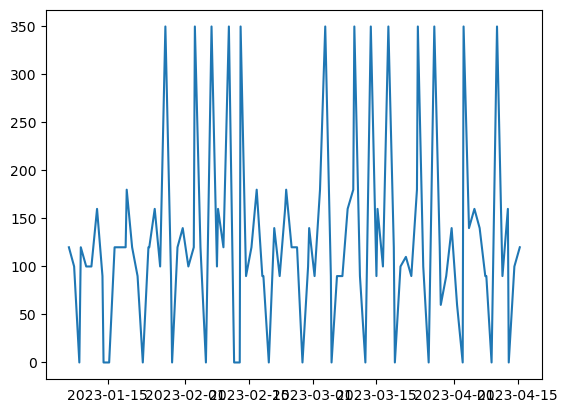

In [13]:
# visualization for the timestamp with the amount paid using the first 100
plt.plot(data['Timestamp'][:100],data["Amount_paid"][:100]);

### Feature Engineering

In [14]:
data["Year"] = data["Timestamp"].dt.year
data["Month"] = data["Timestamp"].dt.month
data["Day"] = data["Timestamp"].dt.day
data["Day_of_the_week"] = data["Timestamp"].dt.dayofweek

In [15]:
data.head()

Transaction_ID           Timestamp Vehicle_Type TollBoothID Lane_Type  \
0               1 2023-01-06 11:20:00         Bus        A-101   Express   
1               2 2023-01-07 14:55:00          Car       B-102   Regular   
2               3 2023-01-08 18:25:00   Motorcycle       D-104   Regular   
3               4 2023-01-09 02:05:00        Truck       C-103   Regular   
4               5 2023-01-10 06:35:00          Van       B-102   Express   

  Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0              Large                 350          120   
1              Small                 120          100   
2              Small                   0            0   
3              Large                 350          120   
4             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292             65           KA11AB1234   
1  13.059816123454882, 77.77068662374292             78           KA66CD5678   
2  13.059816123454882, 77.77068662374292             53           KA88EF9012   
3  13.059816123454882, 77.77068662374292             92           KA11GH3456   
4  13.059816123454882, 77.77068662374292             60           KA44IJ6789   

  Fraud_indicator  Year  Month  Day  Day_of_the_week  
0           Fraud  2023      1    6                4  
1           Fraud  2023      1    7                5  
2       Not Fraud  2023      1    8                6  
3           Fraud  2023      1    9                0  
4           Fraud  2023      1   10                1

In [16]:
data.drop(["Timestamp","Transaction_ID","Vehicle_Plate_Number"],axis=1,inplace=True)

In [17]:
## splitting the columns of geographical location to Lat_lon columns
data[["lat","lon"]] = data["Geographical_Location"].str.split(",", expand=True).astype(float)


In [18]:
data.drop("Geographical_Location", axis=1, inplace=True)

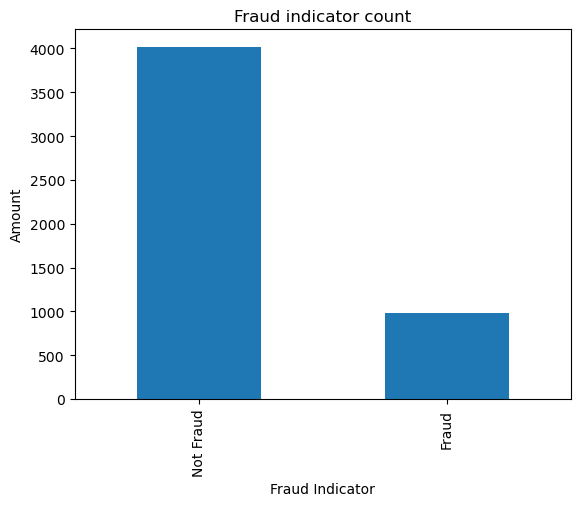

In [19]:
# checking the distribution of my Fraud_indicator
data["Fraud_indicator"].value_counts().plot.bar()
plt.xlabel("Fraud Indicator")
plt.ylabel("Amount")
plt.title("Fraud indicator count");

Note : The distribution of Fraud and Not Fraud might be biased if i build a model with this so i will upscaled my Fraud a little bit and downscaled my Not fraud a little bit

In [20]:
data.head()

Vehicle_Type TollBoothID Lane_Type Vehicle_Dimensions  Transaction_Amount  \
0         Bus        A-101   Express              Large                 350   
1          Car       B-102   Regular              Small                 120   
2   Motorcycle       D-104   Regular              Small                   0   
3        Truck       C-103   Regular              Large                 350   
4          Van       B-102   Express             Medium                 140   

   Amount_paid  Vehicle_Speed Fraud_indicator  Year  Month  Day  \
0          120             65           Fraud  2023      1    6   
1          100             78           Fraud  2023      1    7   
2            0             53       Not Fraud  2023      1    8   
3          120             92           Fraud  2023      1    9   
4          100             60           Fraud  2023      1   10   

   Day_of_the_week        lat        lon  
0                4  13.059816  77.770687  
1                5  13.059816  77.770687  
2                6  13.059816  77.770687  
3                0  13.059816  77.770687  
4                1  13.059816  77.770687

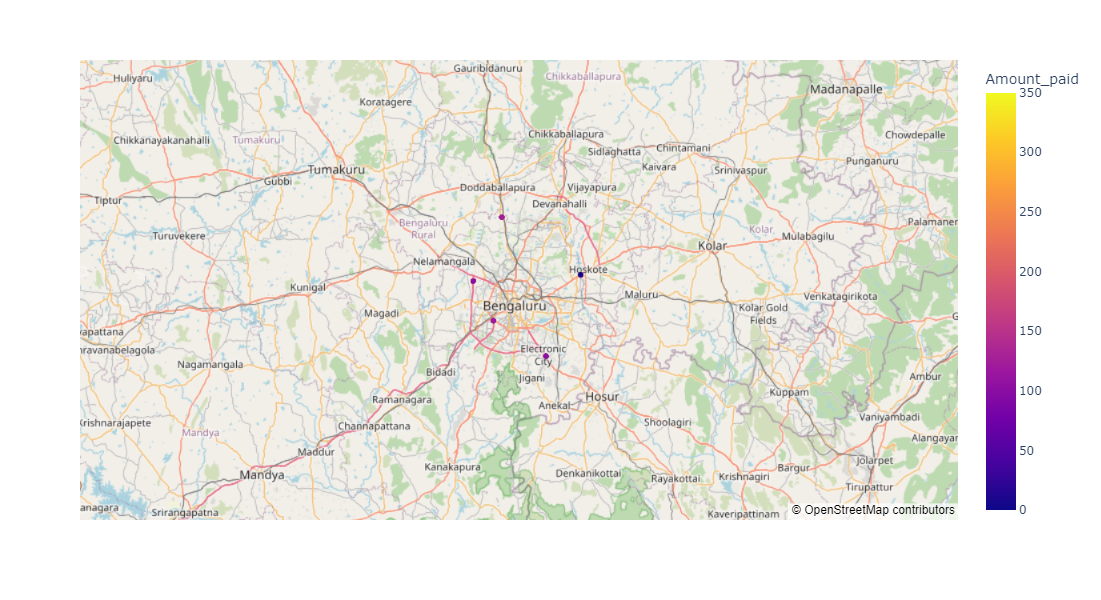

In [21]:
# plotting a visualization of the location by amount paid
fig = px.scatter_mapbox(
    data,  # Our DataFrame
    lat="lat",
    lon="lon",
    width=600,  # Width of map
    height=600,  # Height of map
    color="Amount_paid",
    hover_data=["Amount_paid"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

CPU times: total: 0 ns
Wall time: 0 ns


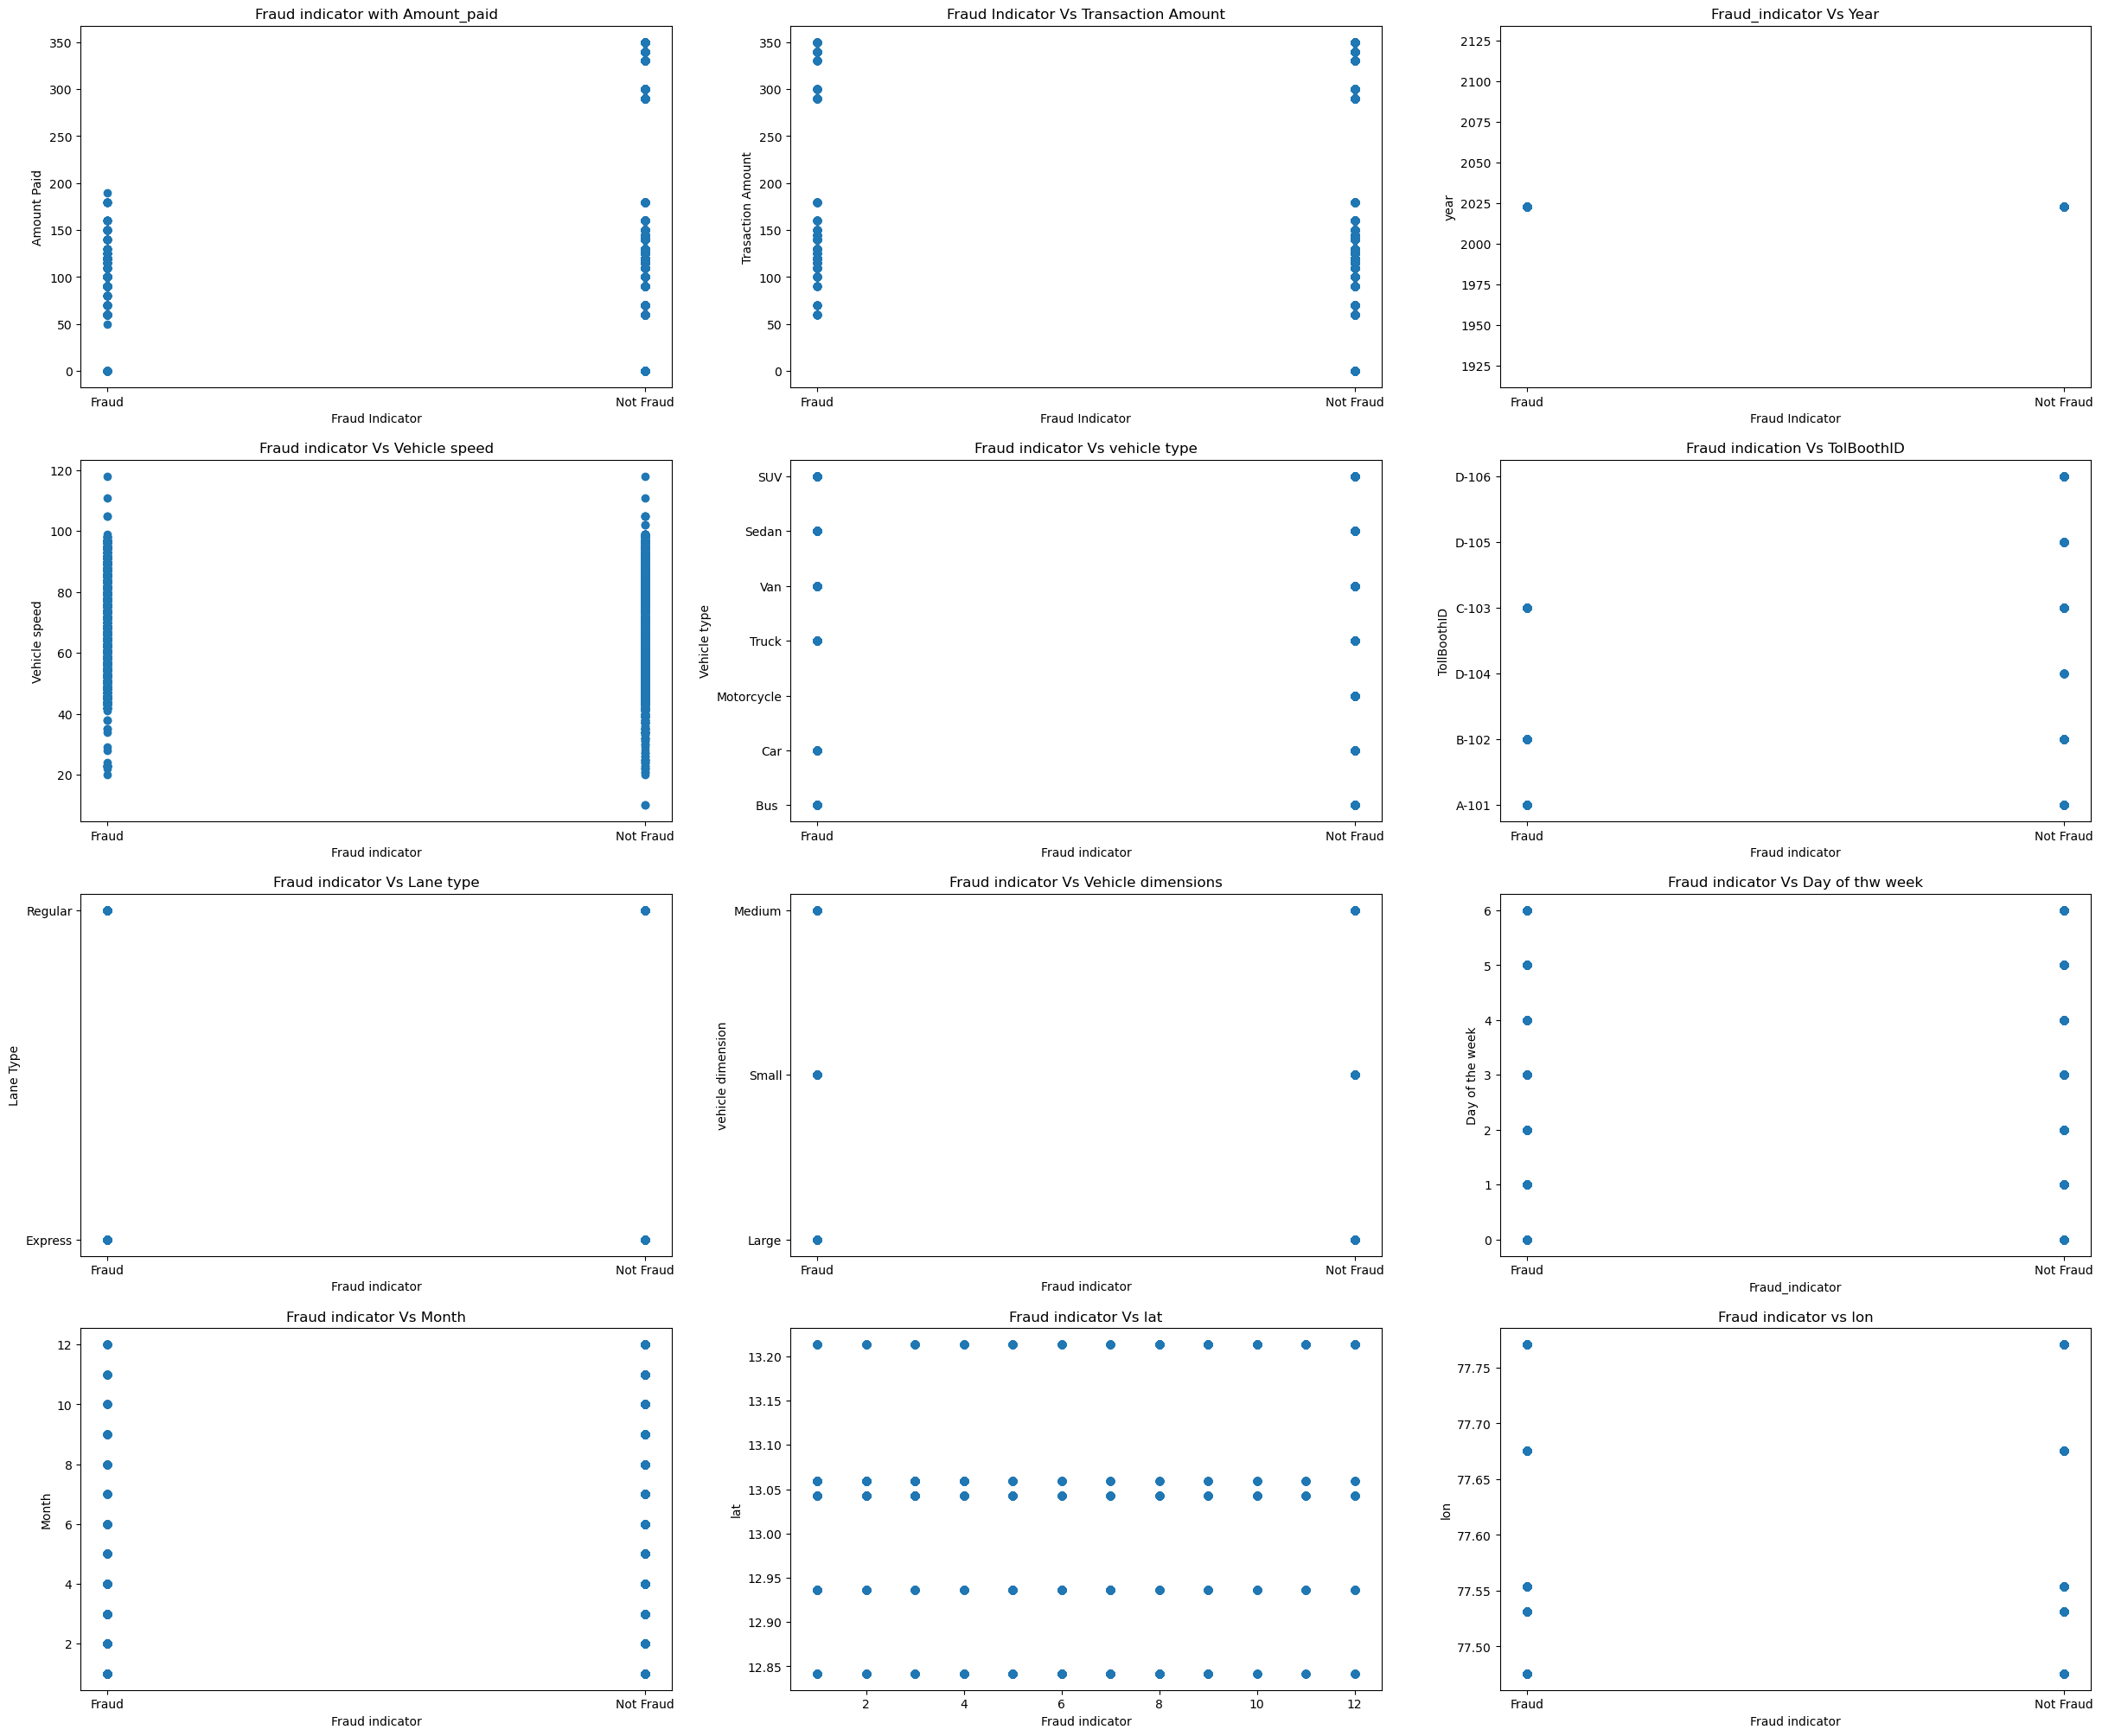

In [22]:
# displaying the visualization of the amount_paid with the year
%time
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) =plt.subplots(nrows=4,
                           ncols=3,
                           figsize=(30,25))


ax1.scatter(data["Fraud_indicator"],data["Amount_paid"])
ax1.set(title="Fraud indicator with Amount_paid",
       xlabel="Fraud Indicator",
       ylabel="Amount Paid")

ax2.scatter(data["Fraud_indicator"], data["Transaction_Amount"])
ax2.set(title="Fraud Indicator Vs Transaction Amount",
       xlabel="Fraud Indicator",
       ylabel="Trasaction Amount")

ax3.scatter(data["Fraud_indicator"],data["Year"])
ax3.set(title= "Fraud_indicator Vs Year",
       xlabel= "Fraud Indicator",
       ylabel= "year")
ax4.scatter(data["Fraud_indicator"], data["Vehicle_Speed"])
ax4.set(title="Fraud indicator Vs Vehicle speed",
       xlabel= "Fraud indicator",
       ylabel="Vehicle speed")

ax5.scatter(data["Fraud_indicator"],data["Vehicle_Type"])
ax5.set(title="Fraud indicator Vs vehicle type",
       xlabel="Fraud indicator",
       ylabel="Vehicle type")

ax6.scatter(data["Fraud_indicator"],data["TollBoothID"])
ax6.set(title="Fraud indication Vs TolBoothID",
       xlabel="Fraud indicator",
       ylabel="TollBoothID")
ax7.scatter(data["Fraud_indicator"],data["Lane_Type"])
ax7.set(title="Fraud indicator Vs Lane type",
       xlabel="Fraud indicator",
       ylabel="Lane Type")
ax8.scatter(data["Fraud_indicator"],data["Vehicle_Dimensions"])
ax8.set(title="Fraud indicator Vs Vehicle dimensions",
       xlabel="Fraud indicator",
       ylabel="vehicle dimension")
ax9.scatter(data["Fraud_indicator"],data["Day_of_the_week"])
ax9.set(title="Fraud indicator Vs Day of thw week",
       xlabel="Fraud_indicator",
       ylabel="Day of the week")
ax10.scatter(data['Fraud_indicator'],data['Month'])
ax10.set(title="Fraud indicator Vs Month",
        xlabel="Fraud indicator",
        ylabel="Month")
ax11.scatter(data["Month"],data["lat"])
ax11.set(title="Fraud indicator Vs lat",
        xlabel="Fraud indicator",
        ylabel="lat")
ax12.scatter(data['Fraud_indicator'],data['lon'])
ax12.set(title="Fraud indicator vs lon",
        xlabel="Fraud indicator",
        ylabel="lon");

In [23]:
# Make the data
data["Fraud_indicator"] = data["Fraud_indicator"].apply(lambda x: 1 if x == "Fraud" else 0)


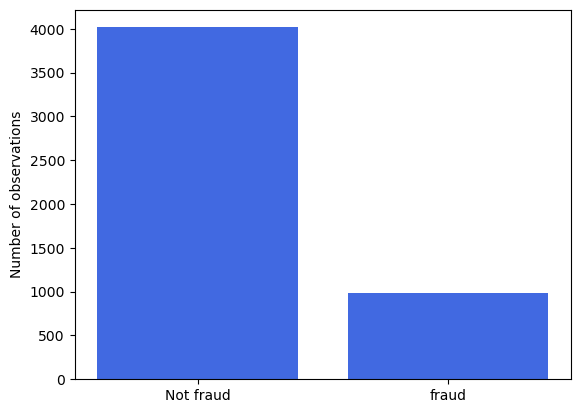

In [24]:
# Separate minority and majority classes
fraud = data[data['Fraud_indicator']==1]
not_fraud = data[data['Fraud_indicator']==0]
# Get all possible labels
labels = data['Fraud_indicator'].unique()
heights = [len(fraud),len(not_fraud)]
plt.bar(labels,heights,color='royalblue')
plt.xticks(labels,['fraud','Not fraud'])
plt.ylabel("Number of observations")
plt.show()

Resampled:


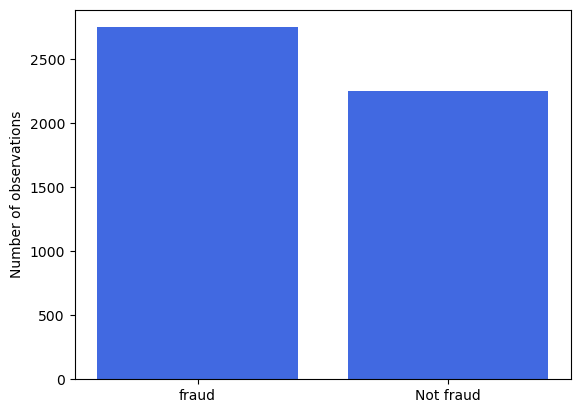

In [25]:
# Downsample majority
not_fraud_downsampled = resample(not_fraud,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=2750, # match number in class size which is half the len of the most occured
                          random_state=42) # reproducible results
# Upsampling the minority
fraud_upsampled = resample(fraud,
                          replace=True, 
                          n_samples=2250, # match number in minority class
                          random_state=42) # reproducible results

# Combine downsampled majority class with minority class
scaling = pd.concat([not_fraud_downsampled,fraud_upsampled])
scaling["Fraud_indicator"].value_counts()

print("Resampled:")
# Separate minority and majority classes
fraud = scaling[scaling['Fraud_indicator']==0]
not_fraud = scaling[scaling['Fraud_indicator']==1]
# Get all possible labels
labels = scaling['Fraud_indicator'].unique()
heights = [len(fraud),len(not_fraud)]
plt.bar(labels,heights,color='royalblue')
plt.xticks(labels,['fraud','Not fraud'])
plt.ylabel("Number of observations")
plt.show()

Note : The fraud indicator has a bit of biase if train because the not fruad is higher than the fraud and if train and test the Not fraud will most likely be at the favourable one. So i did upscaling and downscaling to make it relative closer to each other

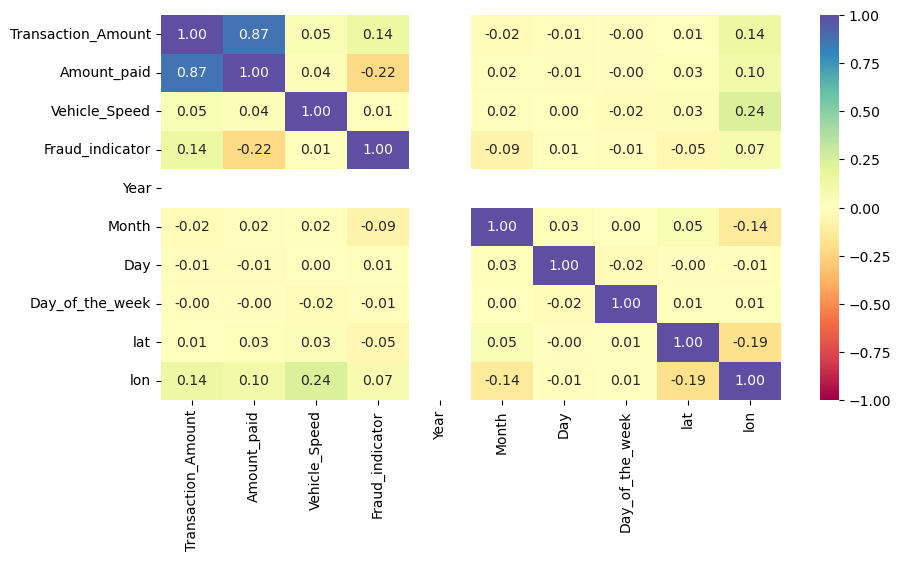

In [26]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## Complete the code to find the correlation between the variables
plt.show()

## Model Building

In [27]:
X= scaling.drop("Fraud_indicator",axis=1)
y=scaling["Fraud_indicator"]

# using dummies to change my categorical data to numerical data
X = pd.get_dummies(X)
X.head()

Transaction_Amount  Amount_paid  Vehicle_Speed  Year  Month  Day  \
1548                  70           70             75  2023      2   17   
1709                  70           70             88  2023      8   22   
3471                 100          100             85  2023      7    8   
1822                   0            0             52  2023      1    1   
4624                 330          330             58  2023      9    4   

      Day_of_the_week        lat        lon  Vehicle_Type_Bus   ...  \
1548                4  12.936687  77.531140              False  ...   
1709                1  12.936687  77.531140              False  ...   
3471                5  13.042661  77.475801              False  ...   
1822                6  12.936687  77.531140              False  ...   
4624                0  13.213316  77.554135              False  ...   

      TollBoothID_B-102  TollBoothID_C-103  TollBoothID_D-104  \
1548              False              False              False   
1709              False              False              False   
3471              False              False              False   
1822              False              False              False   
4624              False               True              False   

      TollBoothID_D-105  TollBoothID_D-106  Lane_Type_Express  \
1548              False              False               True   
1709              False              False              False   
3471              False              False              False   
1822              False               True              False   
4624              False              False               True   

      Lane_Type_Regular  Vehicle_Dimensions_Large  Vehicle_Dimensions_Medium  \
1548              False                     False                      False   
1709               True                     False                      False   
3471               True                     False                       True   
1822               True                     False                      False   
4624              False                      True                      False   

      Vehicle_Dimensions_Small  
1548                      True  
1709                      True  
3471                     False  
1822                      True  
4624                     False  

[5 rows x 27 columns]

In [28]:
## splitting the data
X_train,X_test,y_train,y_test= train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

In [29]:
def classification_model_performance_metrics(dict_models):
    """ Takes is a dictionary of models:
    Rrturns: A data frame Metrics of each classifier
    """

    models  = {}
    result = []
    
    for name, clf in dict_models.items():
        print ('Fitting {:s} model...'.format(name))
    
        run_time = %timeit -q -o clf.fit(X_train, y_train)
    
        print("Predicting...")
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)
    
        print("Scoring...")
        accuracy_train      = accuracy_score(y_train, train_pred)
        recall_train        = recall_score(y_train, train_pred)
        precision_train     = precision_score(y_train, train_pred)
        f1_score_train      = f1_score(y_train, train_pred)
        
        accuracy_test  = accuracy_score(y_test, test_pred)
        recall_test  = recall_score(y_test, test_pred)
        precision_test = precision_score(y_test, test_pred)
        f1_score_test   = f1_score(y_test, test_pred)
    
        # Saving results
        models[name] = clf
    
        result.append([name, accuracy_train, recall_train, precision_train, f1_score_train, accuracy_test, recall_test,
                       precision_test, f1_score_test, run_time.best])
    
    result = pd.DataFrame(result, columns=["Classifier", " Train Accuracy", "Train Recall", "Train Precision", "Train F1 Score",
                                           " Test Accuracy", "Test Recall", "Test Precision", "Test F1 Score", "Train Time"])
    result.set_index("Classifier", inplace=True)
    print("All done!")

    return result

In [30]:
np.random.seed(42)
# Building models
model = {
    "Logistic Regression" : LogisticRegression(),
    "K Neighbors" : KNeighborsClassifier(n_neighbors=100,n_jobs=-1),
    "Linera SVM" : SVC(kernel="linear", C=0.025),
    "RBF SVM" : SVC(gamma=2, C=1),
    "Decision Tree" : DecisionTreeClassifier(max_depth=5,min_samples_leaf=2),
    "Random Forest" : RandomForestClassifier(max_depth=5, n_estimators=100, max_features=2),
    "Ada Boost": AdaBoostClassifier(n_estimators=50)
    
}

models = classification_model_performance_metrics(model)
models

Fitting Logistic Regression model...
Predicting...
Scoring...
Fitting K Neighbors model...
Predicting...
Scoring...
Fitting Linera SVM model...
Predicting...
Scoring...
Fitting RBF SVM model...
Predicting...
Scoring...
Fitting Decision Tree model...
Predicting...
Scoring...
Fitting Random Forest model...
Predicting...
Scoring...
Fitting Ada Boost model...
Predicting...
Scoring...
All done!


Train Accuracy  Train Recall  Train Precision  \
Classifier                                                            
Logistic Regression          0.97050      0.934408         1.000000   
K Neighbors                  0.94525      0.878266         1.000000   
Linera SVM                   0.97425      0.942746         1.000000   
RBF SVM                      1.00000      1.000000         1.000000   
Decision Tree                0.93300      0.851028         1.000000   
Random Forest                0.93225      0.854364         0.994179   
Ada Boost                    0.95200      0.922735         0.969060   

                     Train F1 Score   Test Accuracy  Test Recall  \
Classifier                                                         
Logistic Regression        0.966092           0.977     0.949002   
K Neighbors                0.935188           0.949     0.886918   
Linera SVM                 0.970529           0.980     0.955654   
RBF SVM                    1.000000           0.921     0.824834   
Decision Tree              0.919520           0.926     0.835920   
Random Forest              0.918984           0.921     0.827051   
Ada Boost                  0.945330           0.953     0.933481   

                     Test Precision  Test F1 Score  Train Time  
Classifier                                                      
Logistic Regression        1.000000       0.973834    0.060648  
K Neighbors                1.000000       0.940071    0.002338  
Linera SVM                 1.000000       0.977324    0.800886  
RBF SVM                    1.000000       0.904010    1.197411  
Decision Tree              1.000000       0.910628    0.005558  
Random Forest              0.997326       0.904242    0.250942  
Ada Boost                  0.961187       0.947132    0.202660

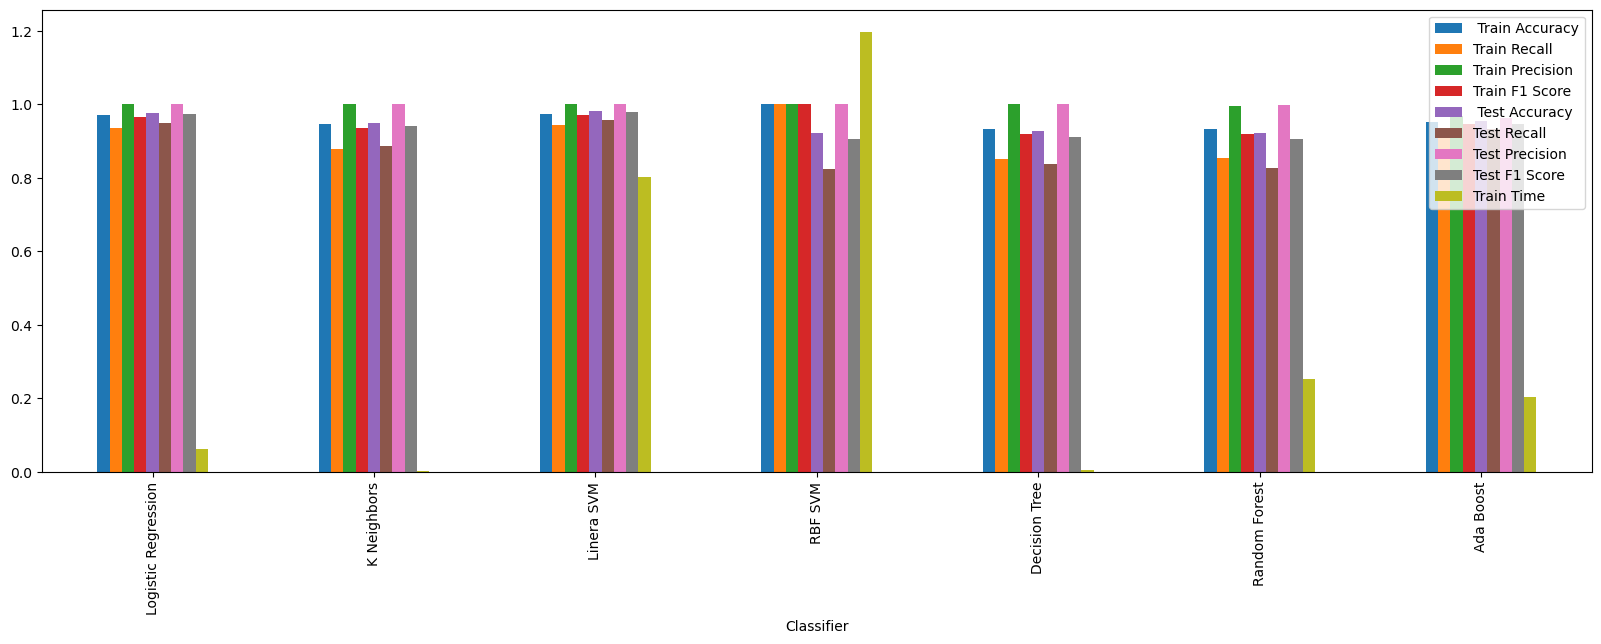

In [31]:
models.plot(kind="bar",figsize=(20,6));

In [32]:
final_model = LogisticRegression()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]

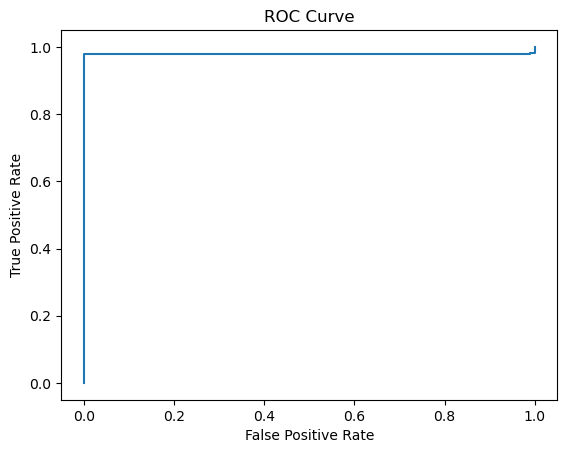

ROC AUC Score: 97.89


In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc * 100 :.2f}')

Note : My roc_curve is closer to 1 with a percentage of 97.89%

In [34]:
# Evaluate the classifier
print("Logistic metrics on the test set")
print(f' Accuracy : { accuracy_score(y_test,y_pred) * 100:.2f}%')
print(f' precision : { precision_score(y_test,y_pred) * 100 :.2f}%')
print(f' recall : { recall_score(y_test,y_pred) * 100 :.2f}%')
print(f' f1 : {f1_score(y_test,y_pred) * 100 :.2f}%')

Logistic metrics on the test set
 Accuracy : 97.70%
 precision : 100.00%
 recall : 94.90%
 f1 : 97.38%


### saving the model

In [35]:

import pickle
pickle.dump(final_model, open("Fraud-prediction-model.pkl", "wb"))
print("Model saved!")

# Load model

load_model = pickle.load(open("Fraud-prediction-model.pkl", "rb"))
print("Model Loaded!")


Model saved!
Model Loaded!


### Feature_importance

In [36]:
# checking the coef_
final_model.coef_

array([[ 0.15882387, -0.1647232 ,  0.00082357, -0.0006709 , -0.04239221,
         0.02253793, -0.02414259, -0.04793674, -0.00261206, -0.13473621,
         0.43695742, -0.57699826,  0.01057371,  0.12540106, -0.13106345,
         0.2698654 ,  0.55202704,  0.29041089, -0.26544   , -0.03013492,
        -0.08537219, -0.46149115,  0.06153324, -0.06153357, -0.25522595,
         0.39526646, -0.14004084]])

In [37]:
# Matching the coeffficient of the features into columns
feature_dict = dict(zip(data.columns,list(final_model.coef_[0])))
feature_dict

{'Vehicle_Type': 0.15882386654428687,
 'TollBoothID': -0.16472320290833897,
 'Lane_Type': 0.0008235701233592332,
 'Vehicle_Dimensions': -0.0006708957392854507,
 'Transaction_Amount': -0.04239220739820058,
 'Amount_paid': 0.02253793375882117,
 'Vehicle_Speed': -0.024142594267639674,
 'Fraud_indicator': -0.047936742132566816,
 'Year': -0.002612055096140559,
 'Month': -0.13473621265169838,
 'Day': 0.43695742244434516,
 'Day_of_the_week': -0.5769982576650363,
 'lat': 0.010573710876630978,
 'lon': 0.12540106219548297}

### displaying the feature dict according to the impact or importance

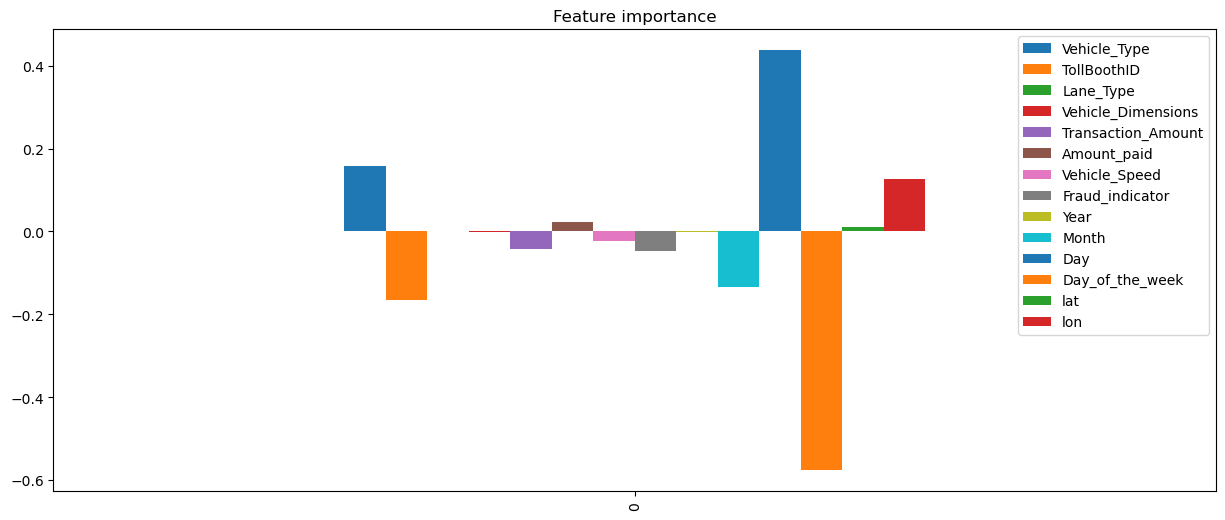

In [38]:
feature_data = pd.DataFrame(feature_dict,index=[0])

# plotting
feature_data.plot(kind="bar",
                  title="Feature importance",
                  legend=True,
                  figsize=(15,6));